******************************
Details:

@Author : Dwarka prasad Bairwa

Dataset : [Diabetes Dataset](https://www.kaggle.com/uciml/pima-indians-diabetes)

Reference Sites: [kaggle](https://www.kaggle.com/) ,  [Medium](https://www.medium.com/)

Topics :

1. [Diabetes Dataset Prediction](#Diabetes-Dataset-Prediction)
2. [Modules](#Modules)
3. [Data Visualization](#Data-Visualization)
4. [Measuring Performance](#Measuring-Performance)
5. [Logistic Regression](#Logistic-Regression)
6. [KNN](#KNN)
7. [Decision Tree Classifier](#Decision-Tree-Classifier)
8. [Random Forest Classifier](#Random-Forest-Classifier)
9. [Support Vector Machine](#Support-Vector-Machine)
10. [Neural Network](#Neural-Network)
    * [Using Scikit learn](#Using-Scikit-Learn)
    * [Using Tesnorflow Keras](#Using-Tesnorflow-Keras)
11. [Naive Bays Classifier](#Naive-Bays-Classifier)
12. [Gradient Boosting Classifier](#Gradient-Boosting-Classifier)

# Diabetes-Dataset-Prediction

1. I used the following classification Algorithms for the predictions:

* Logistic Regression
* KNN
* Random Forest
* Decision Tree
* Support Vector Machine
* Neural Network
    * Using Scikit MLP Classifier
    * Using TensorFlow.Keras
* Naive Bays
* GradientBoosting Classifier

2. Find Results For Each Algorithms:

* Accuracy
* precision
* recall
* f1-score
* Confusion Matrix

3. Data Visualization

#### Libarary Used:

* `Scikit-learn`

* `Matplotlib`

* `Pandas`

* `Numpy`

* `Seaborn`

* `Tensorflow` __For Neural Network__

# Modules

In [527]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
print("True")

True


* __loading Dataset in Pandas__

In [530]:
dataset = pd.read_csv('diabetes.csv')
dataset.describescribe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [606]:
X = dataset.drop(['Outcome'],axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [605]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [206]:
Y = dataset.drop(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'],axis=1)
Y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


* __Finding Null Values__ 

In [77]:
X.isna().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [78]:
Y.isna().sum()

Outcome    0
dtype: int64

# Data-Visualization

* __Counting labels in dataset__

Non Diabetic Patient is :  500
Diabetic Patient is :  268


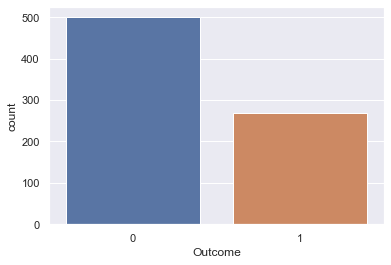

In [569]:
label_0 , label_1 = np.bincount(Y['Outcome'])
print("Non Diabetic Patient is : ",label_0)
print("Diabetic Patient is : ",label_1)
sns.countplot(data=Y,x='Outcome')
plt.savefig('count.png')
plt.show()

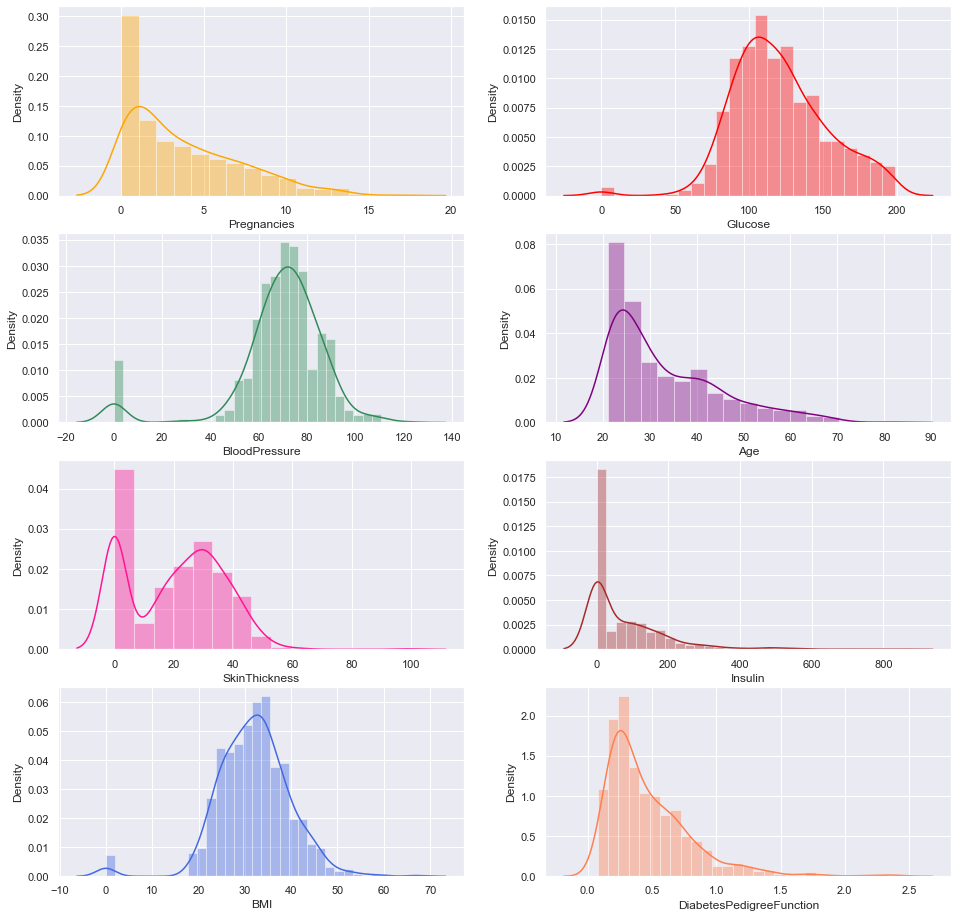

In [583]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.set(font_scale = 1)
sns.distplot(X.Pregnancies, ax = ax[0,0], color = 'orange')
sns.distplot(X.Glucose, ax = ax[0,1], color = 'red')
sns.distplot(X.BloodPressure, ax = ax[1,0], color = 'seagreen')
sns.distplot(X.Age, ax = ax[1,1], color = 'purple')
sns.distplot(X.SkinThickness, ax = ax[2,0], color = 'deeppink')
sns.distplot(X.Insulin, ax = ax[2,1], color = 'brown')
sns.distplot(X.BMI, ax = ax[3,0], color = 'royalblue')
sns.distplot(X.DiabetesPedigreeFunction, ax = ax[3,1], color = 'coral')
plt.show()

* __Pairplot(Multivariate Data Visualization)__

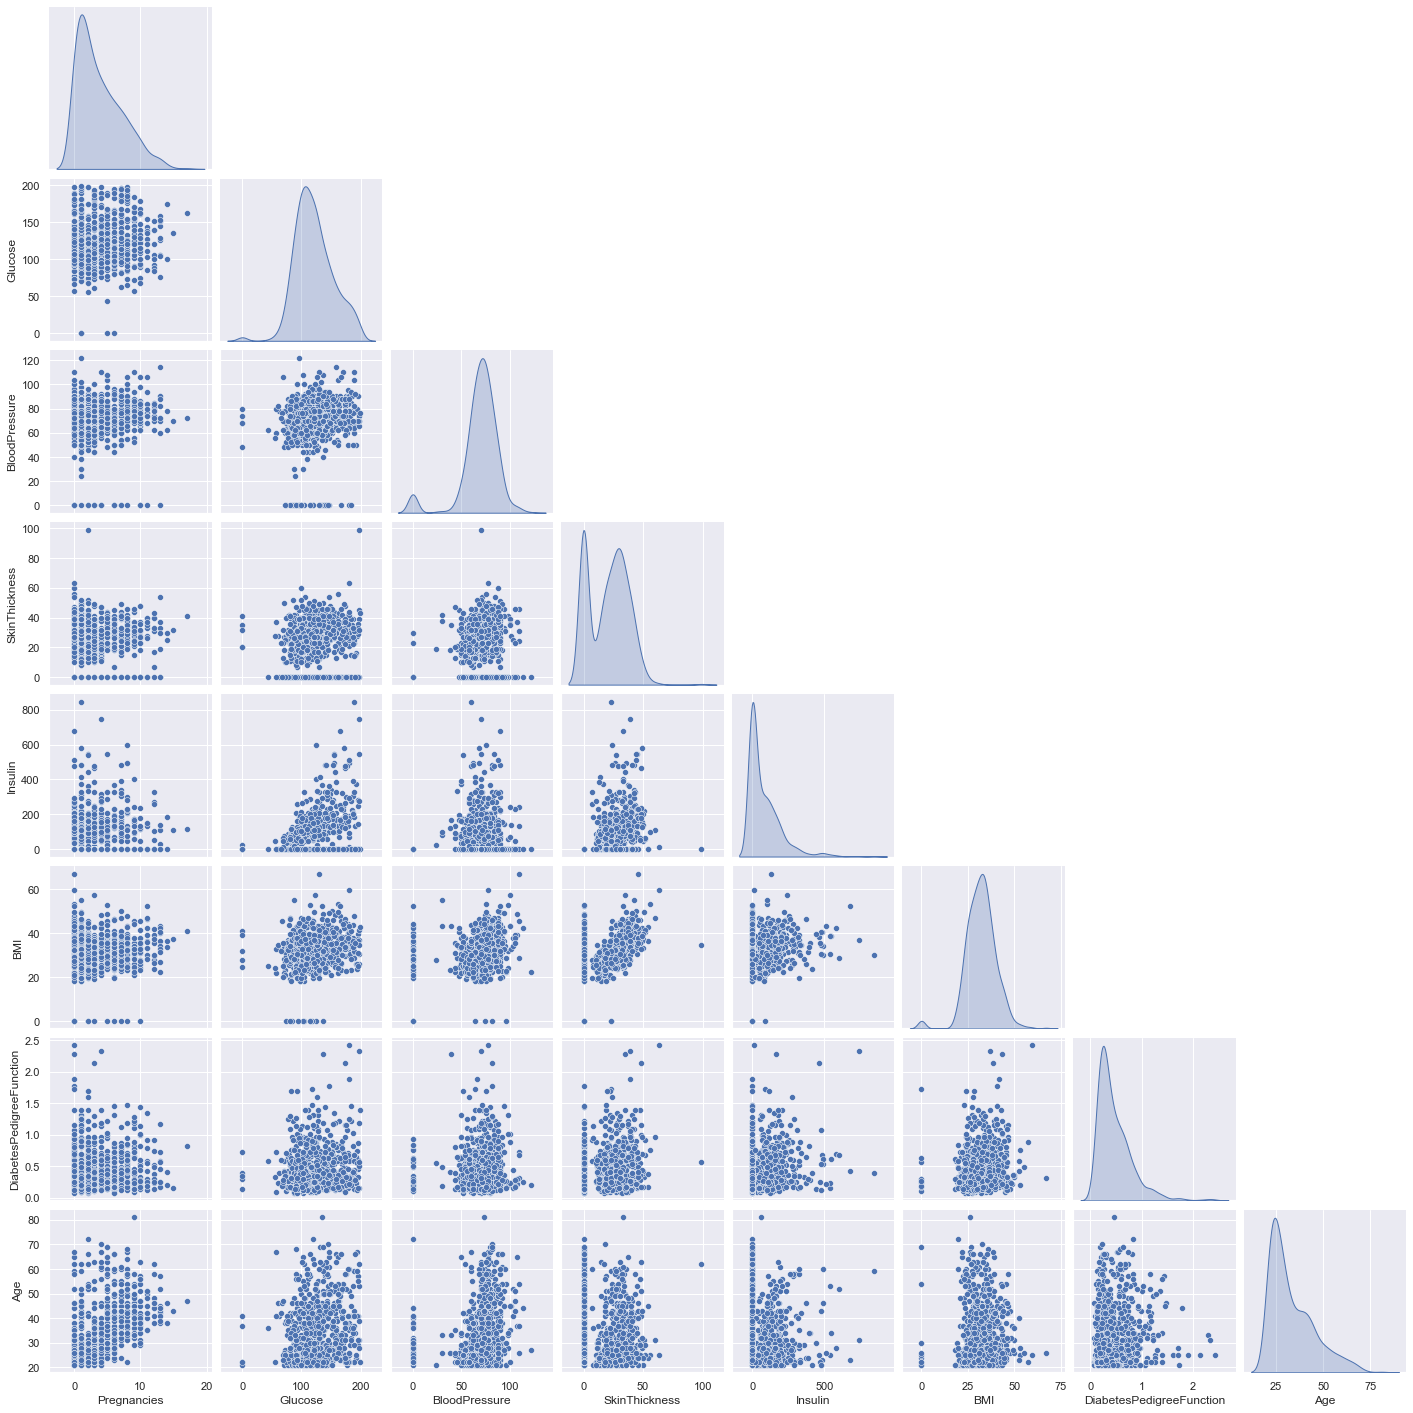

In [585]:
sns.pairplot(X,corner=True,palette='Set2',diag_kind='kde')
plt.savefig('pairplot.png')
plt.show()

***Pearson's Correlation Coefficient***: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

In [586]:
# corrlation matrix 

cor=dataset.corr()
cor.to_csv('corrlation.csv')
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


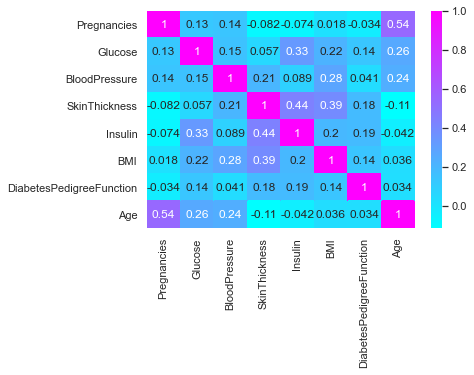

In [573]:
sns.heatmap(X.corr(),annot=True,cmap='cool')
plt.savefig('heat_map.png')
plt.show()

* ___Agewise Patients___

Age Wise Patients: 


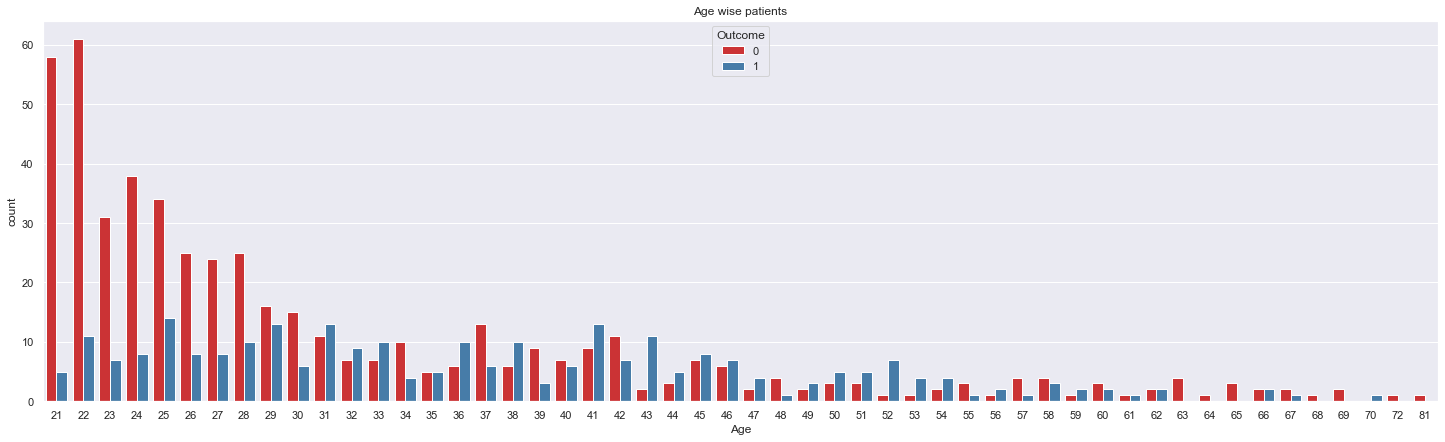

In [574]:
print("Age Wise Patients: ")
plt.figure(figsize=(25,7))
sns.countplot(x='Age',hue='Outcome',data=dataset,palette='Set1')
plt.title("Age wise patients")
plt.savefig('AgeWise_patients.png')
plt.show()

### Data Scaling

In [553]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix

In [554]:
ss = StandardScaler()

* __Splitting dataset into Train and Test Set__

In [555]:
x_train , x_test ,y_train,y_test = train_test_split(X,Y,test_size=0.30,random_state=42)
x_train.shape

(537, 8)

## Scaling the data 

data Z is rescaled such that μ  and 𝛔 , and is done through this formula:
![](https://cdn-images-1.medium.com/max/800/0*PXGPVYIxyI_IEHP7.)

In [449]:
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

# Measuring-Performance

### 1. Confusion Matrix

This is what a confusion matrix looks like:
![Confusion Matrix](https://miro.medium.com/max/712/1*Z54JgbS4DUwWSknhDCvNTQ.png)

Now, let us understand what TP, TN, FP, FN denote in this matrix:


- **True Positives (TP):** These are cases in which we predicted yes (they have the disease), and they do have the disease.
- **True Negatives (TN):** We predicted no, and they don't have the disease.
- **False Positives (FP):** We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")
- **False Negatives (FN):** We predicted no, but they actually do have the disease. (Also known as a "Type II error.")


### 2. Precision

Precision is defined as the number of true positives (TP) over the number of true positives plus the number of false positives (FP).

![Precision](https://miro.medium.com/max/948/1*HGd3_eAJ3-PlDQvn-xDRdg.png)

### 3. Recall

Recall is defined as the number of true positives (TP) over the number of true positives plus the number of false negatives (FN).

![Recall](https://miro.medium.com/max/836/1*dXkDleGhA-jjZmZ1BlYKXg.png)

### 4. F1-Score

F1-score is the harmonic mean of precision and recall.

![F1_Score](https://miro.medium.com/max/564/1*T6kVUKxG_Z4V5Fm1UXhEIw.png)

# 

# Logistic-Regression

Logistic regression is a **classification algorithm** used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes.

It is used when the target variable is binary categorical (0 or 1).

### Sigmoid Function:

The sigmoid function is represented by:

$\large S(z) = \frac{1} {1 + e^{-z}}$

where, 
$\large S(z)$ = output between 0 and 1 (probability estimate),

$\large z$ = input to the function (your algorithm’s prediction e.g. mx + b),

$\large e$ = base of natural log

In [450]:
# model Training

l_model = LogisticRegression()
l_model.fit(x_train,y_train)
l_Y_pred = l_model.predict(x_test)

In [451]:
#test Accuracy

l_acc = l_model.score(x_test,y_test)
l_acc*100

74.45887445887446

In [452]:
#actual value

y_test[1:10]

,Outcome
324,0
624,0
690,0
473,0
204,0
97,0
336,0
568,0
148,0


In [453]:
# predicted value 

l_Y_pred[1:10]

array([0, 0, 0, 0, 0, 0, 1, 1, 1])

* __Confusion Matrix__

[[124  27]
 [ 32  48]]


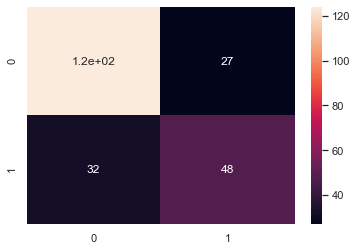

In [537]:
mat = confusion_matrix(y_test,l_Y_pred,labels=[0,1])
print(mat)
sns.heatmap(mat,annot=True,)
plt.show()

* __Classification Report__

In [539]:
rep = classification_report(y_test,l_Y_pred)
print(rep)

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.60      0.62        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



# KNN

In [459]:
from sklearn.neighbors import KNeighborsClassifier

In [587]:
# Finding best K value

train_acc = []
test_acc = []

K = range(1,11)

for k in K:
    
    k_model = KNeighborsClassifier(n_neighbors=k)
    k_model.fit(x_train,y_train)
    t_Accuracy = k_model.score(x_train,y_train)
    Accuracy = k_model.score(x_test,y_test)
    print("test Accurcy for value {} is : {:.2f}".format(k,Accuracy))
    test_acc.append(Accuracy)
    train_acc.append(t_Accuracy)   

test Accurcy for value 1 is : 0.69
test Accurcy for value 2 is : 0.73
test Accurcy for value 3 is : 0.68
test Accurcy for value 4 is : 0.72
test Accurcy for value 5 is : 0.69
test Accurcy for value 6 is : 0.70
test Accurcy for value 7 is : 0.69
test Accurcy for value 8 is : 0.71
test Accurcy for value 9 is : 0.70
test Accurcy for value 10 is : 0.72


##### Now for k=5 we got best test Accuracy  0.72 so we will choose our k value 5

In [461]:
# model Training

k_model = KNeighborsClassifier(n_neighbors=5)
k_model.fit(x_train,y_train)

KNeighborsClassifier()

In [462]:
# predicting value for x_test

k_Y_pred = k_model.predict(x_test)

In [463]:
#actual value

y_test[1:10]

,Outcome
324,0
624,0
690,0
473,0
204,0
97,0
336,0
568,0
148,0


In [464]:
# predicted value 

k_Y_pred[1:10]

array([0, 0, 0, 1, 0, 0, 1, 1, 0])

* __Confusion matix__

[[122  29]
 [ 36  44]]


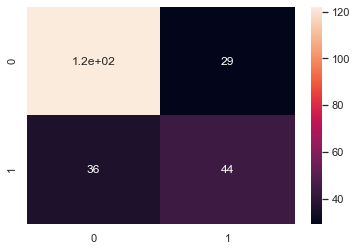

In [540]:
k_mat =confusion_matrix(y_test,k_Y_pred)
print(k_mat)
sns.heatmap(k_mat,annot=True,)
plt.show()

* __Classification Report(Recall , precision , f1_score)__

In [466]:
k_repo =classification_report(y_test,k_Y_pred)
print(k_repo)

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       151
           1       0.60      0.55      0.58        80

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.71      0.72      0.72       231



####  Plotting Train And Test Accuracy

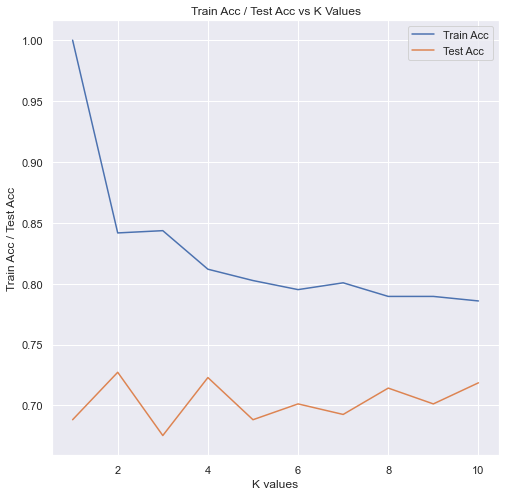

In [604]:
fig = plt.figure(figsize=(8,8)) 
plt.plot(list(K),train_acc,label='Train Acc')
plt.plot(list(K),test_acc,label='Test Acc')
plt.title('Train Acc / Test Acc vs K Values')
plt.xlabel('K values')
plt.ylabel('Train Acc / Test Acc')
plt.legend()
plt.savefig('Train_Acc_Test_Acc_vs_K_Values.png')
plt.show()

# Decision-Tree-Classifier

In [467]:
from sklearn.tree import DecisionTreeClassifier

In [468]:
#decision tree for same dataset

dt_model = DecisionTreeClassifier(max_depth=3,min_samples_leaf=3)
dt_model.fit(x_train,y_train)
dt_Y_pred = dt_model.predict(x_test)
dt_acc = dt_model.score(x_test,y_test)
print("accuracy for testing in Decision Tree is :  {:0.2f}% ".format(dt_acc*100))

accuracy for testing in Decision Tree is :  71.86% 


* __confusion Matrix__

[[139  12]
 [ 53  27]]


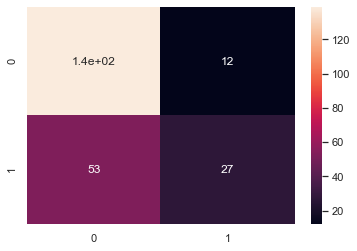

In [541]:
#confusion matrix

dt_mat = confusion_matrix(y_test,dt_Y_pred)
print(dt_mat)
sns.heatmap(dt_mat,annot=True,)
plt.show()

* __Classification report__

In [470]:
dt_repo =classification_report(y_test,dt_Y_pred)
print(dt_repo)

              precision    recall  f1-score   support

           0       0.72      0.92      0.81       151
           1       0.69      0.34      0.45        80

    accuracy                           0.72       231
   macro avg       0.71      0.63      0.63       231
weighted avg       0.71      0.72      0.69       231



In [471]:
#actual value

y_test[1:10]

,Outcome
324,0
624,0
690,0
473,0
204,0
97,0
336,0
568,0
148,0


In [472]:
# predicted value 

dt_Y_pred[1:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0])

In [473]:
import pydotplus

* __Plotting graph__

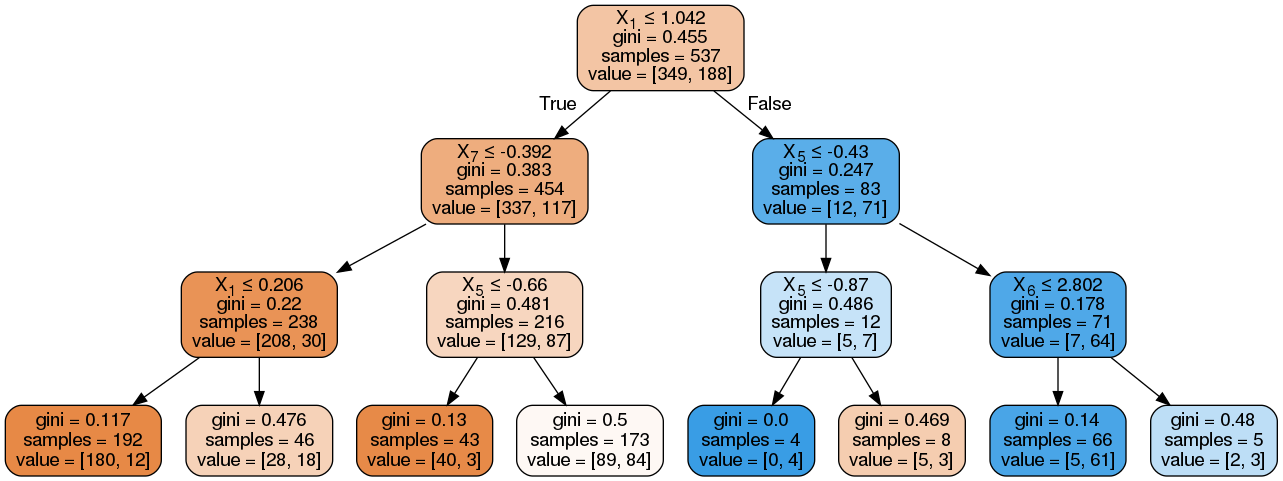

In [577]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = export_graphviz(dt_model, out_file=None,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

# 

# Random-Forest-Classifier

In [475]:
from sklearn.ensemble import RandomForestClassifier

In [476]:
#random forest for same dataset

r_model = RandomForestClassifier(n_estimators=200,max_samples=0.5)
r_model.fit(x_train,y_train)
r_Y_pred = r_model.predict(x_test)
accuracy_rf = r_model.score(x_test,y_test)
print("accuracy for testing in Random Forest is :  {:0.2f}% ".format(accuracy_rf*100))

accuracy for testing in Random Forest is :  73.59% 


* __Confusion Matrix__

[[122  29]
 [ 32  48]]


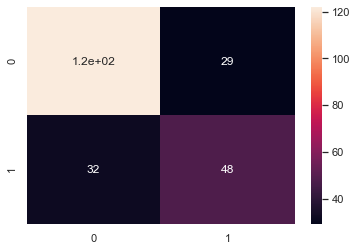

In [542]:
#confusion matrix

r_mat = confusion_matrix(y_test,r_Y_pred)
print(r_mat)
sns.heatmap(r_mat,annot=True,)
plt.show()

* __Classification Report__

In [478]:
r_repo =classification_report(y_test,r_Y_pred)
print(r_repo)

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.62      0.60      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.73      0.74      0.73       231



In [479]:
#actual value

y_test[1:10]

,Outcome
324,0
624,0
690,0
473,0
204,0
97,0
336,0
568,0
148,0


In [480]:
# predicted value 

r_Y_pred[1:10]

array([0, 0, 0, 1, 1, 0, 1, 1, 1])

In [481]:
estimate = r_model.estimators_[0]

* __Plotting Graph__

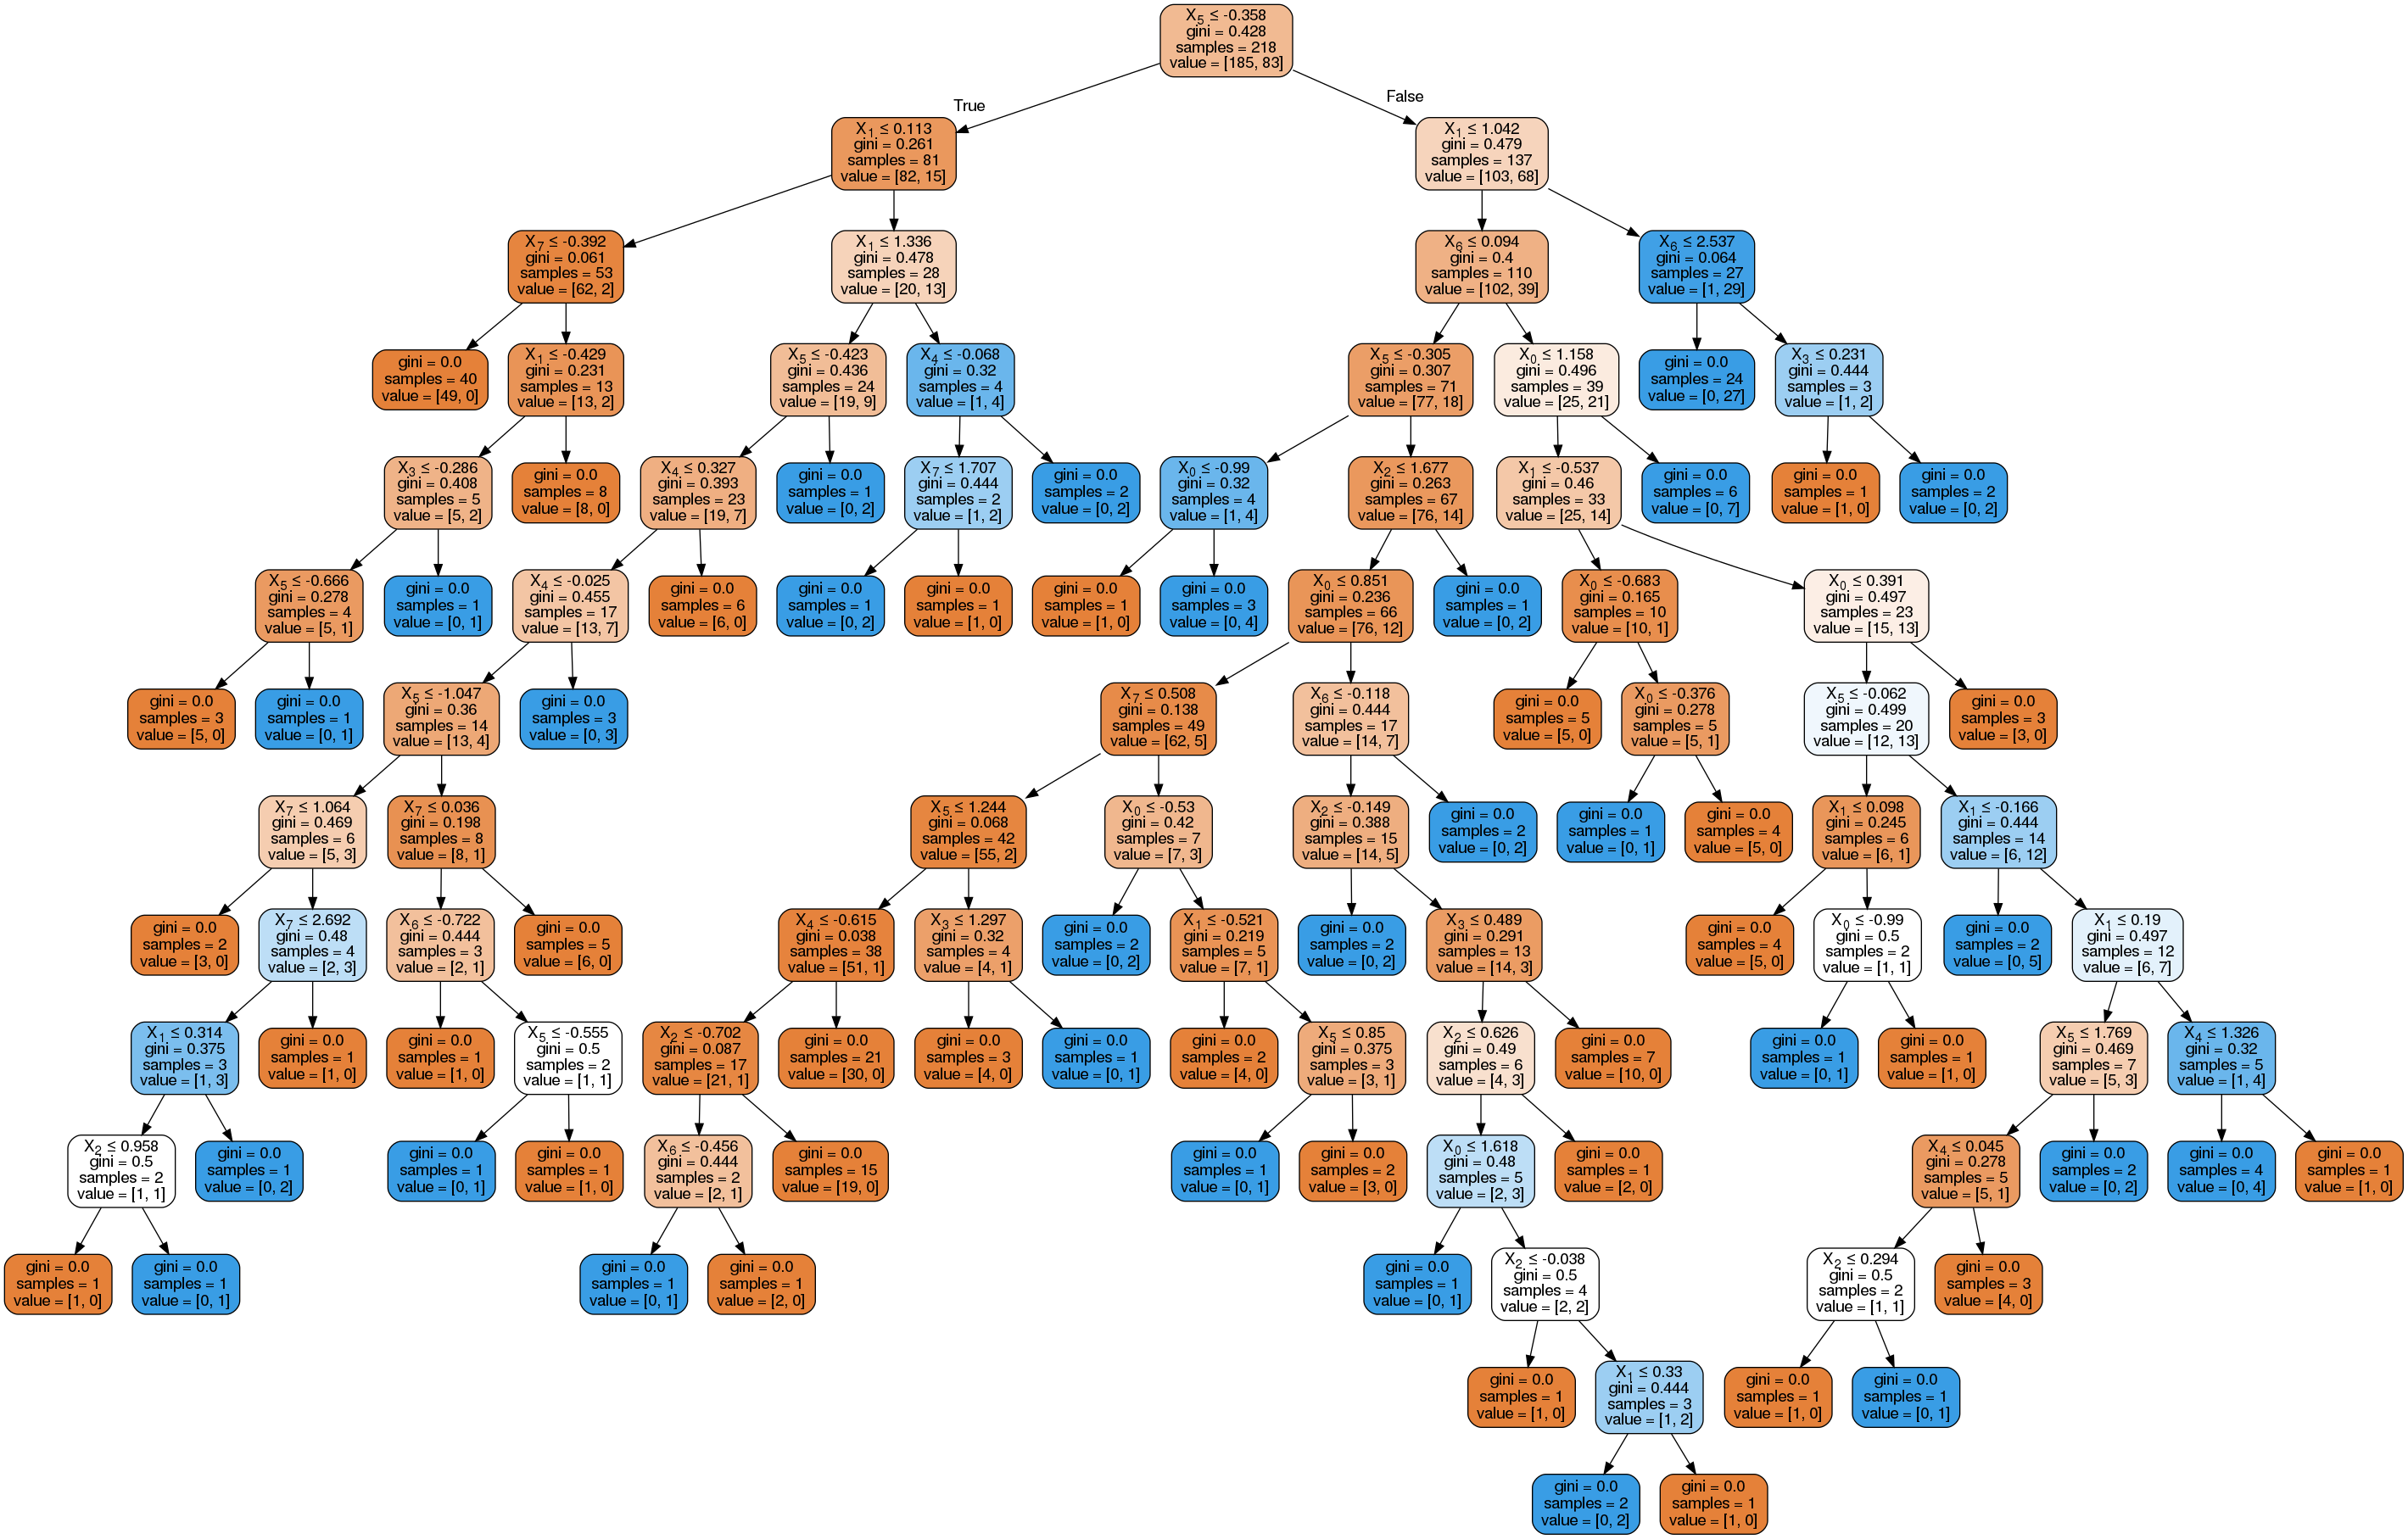

In [579]:
dot_data_1 = export_graphviz(estimate, out_file=None,  
                filled=True, rounded=True,
                special_characters=True)

graph1 = pydotplus.graph_from_dot_data(dot_data_1)

Image(graph1.create_png())

# 

# Support-Vector-Machine

In [483]:
from sklearn.svm import SVC

In [484]:
#Train model

# C=1 and kernal = 'linear'

s_model = SVC(kernel='rbf')
s_model.kernel

'rbf'

In [485]:
s_model.fit(x_train,y_train)

SVC()

In [486]:
#test Accuracy

s_acc = s_model.score(x_test,y_test)
print("accuracy for testing in Support Vector Machine is :  {:0.2f}% ".format(s_acc*100))

accuracy for testing in Support Vector Machine is :  75.32% 


In [487]:
s_Y_pred = s_model.predict(x_test)

* __Confusion Matrix__

[[126  25]
 [ 32  48]]


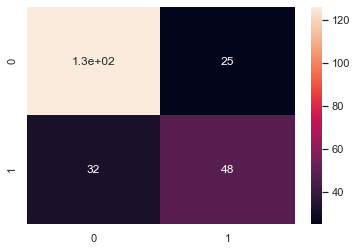

In [543]:
#confusion matrix

s_mat = confusion_matrix(y_test,s_Y_pred)
print(s_mat)
sns.heatmap(s_mat,annot=True,)
plt.show()

* __Classification Report__

In [489]:
s_repo =classification_report(y_test,s_Y_pred)
print(s_repo)

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       151
           1       0.66      0.60      0.63        80

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



In [490]:
#actual value

y_test[1:10]

,Outcome
324,0
624,0
690,0
473,0
204,0
97,0
336,0
568,0
148,0


In [491]:
# predicted value 

s_Y_pred[1:10]

array([0, 0, 0, 1, 0, 0, 1, 1, 1])

# 

# Neural-Network

### **Using-Scikit-Learn**

In [492]:
from sklearn.neural_network import MLPClassifier

In [493]:
#model

mlp = MLPClassifier(random_state=1,max_iter=300)
print(mlp.alpha,mlp.activation,mlp.hidden_layer_sizes,mlp.learning_rate_init)

0.0001 relu (100,) 0.001


In [494]:
#Training model

mlp.fit(x_train,y_train)

MLPClassifier(max_iter=300, random_state=1)

In [495]:
#Test Accuracy

mlp_score = mlp.score(x_test,y_test)
print("accuracy for testing in Neural Network is :  {:0.2f}% ".format(mlp_score*100))

accuracy for testing in Neural Network is :  72.73% 


In [496]:
#predicting

mlp_Y_pred = mlp.predict(x_test)

* __Confusion Matrix__

[[121  30]
 [ 33  47]]


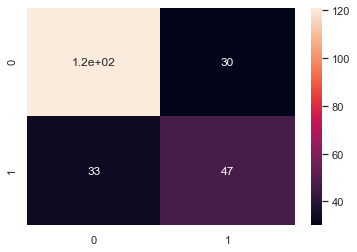

In [544]:
#confusion matrix

mlp_mat = confusion_matrix(y_test,mlp_Y_pred)
print(mlp_mat)
sns.heatmap(mlp_mat,annot=True,)
plt.show()

* __Classification Report__

In [498]:
mlp_repo =classification_report(y_test,mlp_Y_pred)
print(mlp_repo)

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       151
           1       0.61      0.59      0.60        80

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.72      0.73      0.73       231



In [499]:
#actual value

y_test[1:10]

,Outcome
324,0
624,0
690,0
473,0
204,0
97,0
336,0
568,0
148,0


In [500]:
# predicted value 

s_Y_pred[1:10]

array([0, 0, 0, 1, 0, 0, 1, 1, 1])

# 

### **Using-Tesnorflow-Keras**

In [501]:
import tensorflow as tf

In [502]:
#Building model

tf_model = tf.keras.models.Sequential()
tf_model.add(tf.keras.layers.Dense(9,input_shape=(8,), activation=tf.nn.relu))
tf_model.add(tf.keras.layers.Dense(8,activation=tf.nn.relu))
tf_model.add(tf.keras.layers.Dense(2,activation=tf.nn.sigmoid))

In [503]:
tf_model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [504]:
#training model

tf_model.fit(x=x_train, y=y_train, epochs=10,batch_size=200)

Epoch 1/10
3/3 [==============================] - 0s 4ms/step - loss: 0.7249 - accuracy: 0.6201
Epoch 2/10
3/3 [==============================] - 0s 4ms/step - loss: 0.7190 - accuracy: 0.6276
Epoch 3/10
3/3 [==============================] - 0s 4ms/step - loss: 0.7137 - accuracy: 0.6350
Epoch 4/10
3/3 [==============================] - 0s 5ms/step - loss: 0.7084 - accuracy: 0.6443
Epoch 5/10
3/3 [==============================] - 0s 6ms/step - loss: 0.7029 - accuracy: 0.6518
Epoch 6/10
3/3 [==============================] - 0s 4ms/step - loss: 0.6981 - accuracy: 0.6648
Epoch 7/10
3/3 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.6667
Epoch 8/10
3/3 [==============================] - 0s 5ms/step - loss: 0.6880 - accuracy: 0.6741
Epoch 9/10
3/3 [==============================] - 0s 4ms/step - loss: 0.6835 - accuracy: 0.6741
Epoch 10/10
3/3 [==============================] - 0s 5ms/step - loss: 0.6783 - accuracy: 0.6778


In [505]:
#Accuracy for test data
test_loss,test_acc = tf_model.evaluate(x=x_test, y=y_test)
print("test accuracy for the model is : {}%".format(test_acc*100))

8/8 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.6234
test accuracy for the model is : 62.337660789489746%


In [506]:
#predicting values
tf_pred = tf_model.predict([x_test])

* __Confusion Matrix__

[[118  33]
 [ 54  26]]


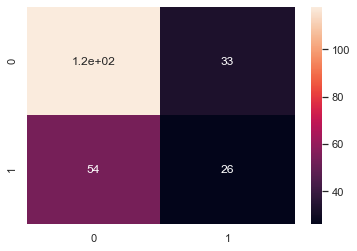

In [545]:
#confusion matrix

tf_mat = confusion_matrix(y_test,np.argmax(tf_pred,axis=1))
print(tf_mat)
sns.heatmap(tf_mat,annot=True,)
plt.show()

* __Classification report__

In [523]:
#classification report

print(classification_report(y_test,np.argmax(tf_pred,axis=1)))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73       151
           1       0.44      0.33      0.37        80

    accuracy                           0.62       231
   macro avg       0.56      0.55      0.55       231
weighted avg       0.60      0.62      0.61       231



In [507]:
#actual value

y_test[1:10]

,Outcome
324,0
624,0
690,0
473,0
204,0
97,0
336,0
568,0
148,0


In [508]:
# predicted value 

for i in range(1,11):
    print(np.argmax(tf_pred[i]),end= " ")

0 0 0 1 1 0 0 0 1 0 

# 

# Naive-Bays-Classifier

In [509]:
from sklearn.naive_bayes import GaussianNB

In [510]:
# Building Model

naive_model = GaussianNB()

In [511]:
#Training model

naive_model.fit(x_train,y_train)

GaussianNB()

In [512]:
# Test Accuracy

naive_test = naive_model.score(x_test,y_test)
print("test accuracy for the Naive Bays model is : {}%".format(naive_test*100))

test accuracy for the Naive Bays model is : 75.32467532467533%


In [513]:
# prediction

naive_pred = naive_model.predict(x_test)

* __Confusion Matrix__

[[122  29]
 [ 28  52]]


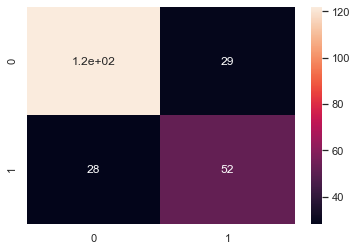

In [546]:
#confusion matrix
naive_mat = confusion_matrix(y_test,naive_pred)
print(naive_mat)
sns.heatmap(naive_mat,annot=True,)
plt.show()

* __Classification Report__

In [518]:
#classification report

print(classification_report(y_test,naive_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       151
           1       0.64      0.65      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



In [514]:
#actual value
y_test[1:10]

,Outcome
324,0
624,0
690,0
473,0
204,0
97,0
336,0
568,0
148,0


In [515]:
# predicted value 
naive_pred[1:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1])

# 

# Gradient-Boosting-Classifier

In [558]:
from sklearn.ensemble import GradientBoostingClassifier

In [559]:
# Model

GBC = GradientBoostingClassifier()

In [560]:
# Train model

GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [562]:
# Test Accuracy

GBC_test = GBC.score(x_test,y_test)
print("test accuracy for the GradientBoosting Classifier model is : {}%".format(GBC_test*100))

test accuracy for the GradientBoosting Classifier model is : 74.45887445887446%


In [563]:
# Predicting values

GBC_pred = GBC.predict(x_test)

* __Confusion Matrix__

[[119  32]
 [ 27  53]]


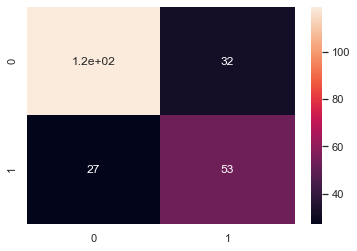

In [564]:
#confusion matrix
GBC_mat = confusion_matrix(y_test,GBC_pred)
print(GBC_mat)
sns.heatmap(GBC_mat,annot=True,)
plt.show()

* __Classification Report__

In [565]:
#classification report

print(classification_report(y_test,GBC_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



In [566]:
#actual value
y_test[1:10]

,Outcome
324,0
624,0
690,0
473,0
204,0
97,0
336,0
568,0
148,0


In [567]:
# predicted value 
GBC_pred[1:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1])